<a href="https://colab.research.google.com/github/alexbonella/Counting_Yolov3/blob/master/YOLO_POR_LOTES_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf

# **GPU ACCELERATOR**

In [3]:
nombre_gpu = tf.test.gpu_device_name()
if nombre_gpu != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('GPU encontrada: {}'.format(nombre_gpu))

GPU encontrada: /device:GPU:0


In [4]:
!nvidia-smi

Fri Jun 19 16:03:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    23W /  75W |    115MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Clonando  Darknet**


In [5]:
# clone darknet repo por lotes 
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 13714, done.
remote: Total 13714 (delta 0), reused 0 (delta 0), pack-reused 13714
Receiving objects: 100% (13714/13714), 12.31 MiB | 5.22 MiB/s, done.
Resolving deltas: 100% (9353/9353), done.


# **Editamos Makefile**

In [6]:

%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

/content/darknet
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:12 https://developer

In [7]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


# **YOLOv3 weights**


In [ ]:
# get yolov3 pretrained coco dataset weights
#!wget https://pjreddie.com/media/files/yolov3.weights

In [8]:
%cd ..
from google.colab import drive


drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Makefile**

In [9]:
# make darknet (build)
%cd darknet/
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

In [10]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [16]:
!ls '/mydrive/Yolo_Lotes Tutorial'

'Analysis Top 100 Spotify Tracks of 2018.gdoc'	 dataset_50
 Counting_Objects_Images.py			 YOLO_POR_LOTES_Tutorial.ipynb
 counting.py					 yolov3.weights
 dataset_10


# **Copiamos pesos originales a carpeta darknet** 

In [20]:
import os 

In [17]:
#!cp yolov3.weights '/mydrive/Yolo_Lotes Tutorial'
!cp  '/mydrive/Yolo_Lotes Tutorial/yolov3.weights' '/content/darknet'

In [25]:
# Visualization function 
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# **Predicción YOLO** 

In [43]:
%%time
!./darknet detect cfg/yolov3.cfg yolov3.weights '/mydrive/Yolo_Lotes Tutorial/dataset_50/7.working-lunch.jpg'

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

# **Visualizamos imagen** 

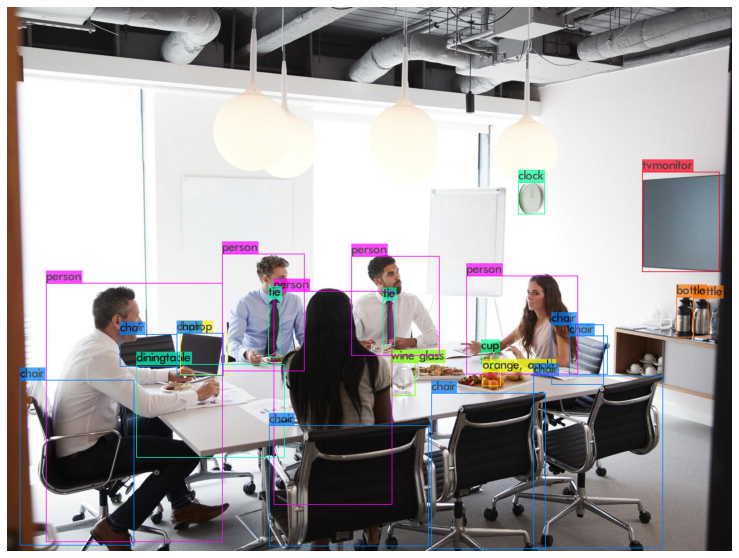

In [44]:
imShow('predictions.jpg')

# **Creamos archivo train.txt** 


In [50]:
lista_img=[imagenes for imagenes in os.listdir('/mydrive/Yolo_Lotes Tutorial/dataset_10') if imagenes.endswith('.jpg')==True]

In [51]:
rutas=[]
for i in range(len(lista_img)):
  rutas.append('data/'+lista_img[i])

rutas

['data/1.oficinas01-1.jpg',
 'data/2.mesa-iven-blanca1.jpg',
 'data/3.Tendencias-en-el-alquiler-de-oficinas-en-Madrid-2018-1182x675.jpg',
 'data/4.1519830649_122505_1519830777_noticia_normal.jpg',
 'data/5.nh-oficinas-madrid-0022-700x467.jpg',
 'data/6.Office.jpg',
 'data/7.nh-oficinas-madrid-0180-700x467.jpg',
 'data/8.oficinas00-1-1024x576.jpg',
 'data/10.x_microsoft_11.jpg']

In [63]:
rutas1=[]

lista_img2=[imagenes for imagenes in os.listdir('/mydrive/Yolo_Lotes Tutorial/dataset_50') if imagenes.endswith('.jpg')==True]

PATH_IMG='/mydrive/Yolo_Lotes Tutorial/dataset_50/'
for imagenes in lista_img2:
  rutas1.append(PATH_IMG+imagenes)

# Creamos archivo
file=open("data/train.txt","w")

for i in range(len(rutas1)):
  file.write(rutas1[i]+'\n')

file.close()


# **Conteo por lotes**

In [64]:
%%time
from datetime import datetime
antes=datetime.now()
!./darknet detector test ./cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show < data/train.txt > resultados.txt


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 B

In [65]:
despues=datetime.now()
final=despues-antes

print('EL TIEMPO DE PROCESAMIENTO POR IMAGENES FUE ' + str(round(final.total_seconds()/len(lista_img),2)) + ' SEGUNDOS')
print('\n')
print('EL TIEMPO TOTAL DE PROCESAMIENTO FUE ' + str(round(final.total_seconds(),2)) + ' SEGUNDOS')

EL TIEMPO DE PROCESAMIENTO POR IMAGENES FUE 1.91 SEGUNDOS


EL TIEMPO TOTAL DE PROCESAMIENTO FUE 17.18 SEGUNDOS


# **Conteo de objetos en las imagenes** 

Para evitar el conteo de clases falsas debemos ajustar el score por lo general debe ser  `( > 25 )` en modelos personalizados , pero cada modelo se comporta diferente o en ocasiones ustedes tendran preferencia por una clase en especial . 

In [55]:
!cp '/content/gdrive/My Drive/Yolo_Lotes Tutorial/Counting_Objects_Images.py' '/content/darknet'
!cp '/content/gdrive/My Drive/Yolo_Lotes Tutorial/counting.py' '/content/darknet'

# **Conteo lote de 10 Imagenes**

In [66]:
import counting

counting.Counting_objects('resultados_10.txt',25)

,Name Image,Counting object,Total counting
0,1.oficinas01-1.jpg,"{'chair': 3, 'diningtable': 2, 'sofa': 1, 'pot...",12
1,2.mesa-iven-blanca1.jpg,"{'book': 4, 'tvmonitor': 1, 'diningtable': 1, ...",7
2,3.Tendencias-en-el-alquiler-de-oficinas-en-Mad...,"{'chair': 4, 'diningtable': 1, 'tvmonitor': 1}",6
3,4.1519830649_122505_1519830777_noticia_normal.jpg,"{'book': 11, 'chair': 3, 'diningtable': 1, 'bo...",17
4,5.nh-oficinas-madrid-0022-700x467.jpg,"{'chair': 15, 'tvmonitor': 1}",16
5,6.Office.jpg,"{'chair': 6, 'laptop': 3, 'person': 3, 'vase': 1}",13
6,7.nh-oficinas-madrid-0180-700x467.jpg,"{'tvmonitor': 13, 'keyboard': 4, 'chair': 4, '...",23
7,8.oficinas00-1-1024x576.jpg,"{'chair': 3, 'diningtable': 1, 'mouse': 1, 'la...",7
8,10.x_microsoft_11.jpg,"{'tvmonitor': 7, 'person': 5, 'laptop': 4, 'ch...",17


# **Conteo lote de 50 Imagenes**

In [67]:
counting.Counting_objects('resultados.txt',25)

,Name Image,Counting object,Total counting
0,1.Fullscreen-la-8.jpg,"{'chair': 4, 'diningtable': 1, 'laptop': 1}",6
1,2.OfficeCondos_4.jpg,"{'person': 5, 'pottedplant': 5, 'chair': 2, 'k...",16
2,3.edison-bulbs.jpg,"{'chair': 7, 'diningtable': 3, 'laptop': 1, 'p...",13
3,4.02-23.jpg,"{'book': 12, 'chair': 9, 'pottedplant': 2, 'ca...",26
4,5.office-modern-industrial-loft-ismagilov_thin...,"{'chair': 4, 'mouse': 2, 'diningtable': 1}",7
5,7.working-lunch.jpg,"{'chair': 8, 'person': 5, 'tie': 2, 'bottle': ...",25
6,6.chive-office-pics-10.jpg,"{'chair': 8, 'sink': 1, 'diningtable': 1, 'ref...",12
7,8.Rebecca-Taylor-Office_01.jpg,"{'chair': 4, 'book': 3, 'vase': 2, 'diningtabl...",11
8,9.HCMO_New_Image_CEO_Office_2.8d129735.jpg,"{'chair': 4, 'tvmonitor': 2, 'pottedplant': 2,...",10
9,10.ULI-Capitol-Executive-Suites-Lobby-Conferen...,"{'chair': 7, 'pottedplant': 3, 'diningtable': ...",14


# FINAL ...